In [ ]:
import pkg_resources as pkg
path = pkg.resource_filename(__name__, "../")


import os 
os.chdir( path )

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from braindecode.visualization import plot_confusion_matrix

In [2]:
module = TinySleepNet.load_from_checkpoint("/home/guido/github/dev/inter-sleep/models/tinysleepnet/SleepPhysionet/2018/fold_0/epoch=0-step=4800.ckpt")

y_pred = []
y_true = []

# iterate over test data
testloader = datamodule.test_dataloader()

for i, data in enumerate(tqdm(testloader)):
        inputs, labels = data
        output = module(inputs.to(torch.device("cuda"))) # Feed Network

        output = output.reshape(-1, output.size(2))

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        labels = labels.reshape(-1)
        y_true.extend(labels) # Save Truth

# constant for classes
classes = ('Wake', 'NREM1', 'NREM2', "NREM3", "REM")



# Build confusion matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = classes )
disp.plot().figure_.savefig(ckp_path +'confusion_matrix.png')

report = classification_report(y_true, y_pred, labels=classes, output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv(ckp_path + 'classification_report.csv')




NameError: name 'te' is not defined

2023-11-25 16:44:51.984 | INFO     | physioex.train.base:test_classifier:100 - Model test score: 0.6528830412902443
2023-11-25 16:44:51.990 | INFO     | physioex.train.base:test_classifier:101 - Model test balanced score: 0.5888722655338288
2023-11-25 16:44:51.995 | INFO     | physioex.train.base:test_classifier:102 - Cohen-kappa: 0.5339002218848474
2023-11-25 16:44:51.996 | INFO     | physioex.train.base:test_classifier:104 - Testing dataset classification report


              precision    recall  f1-score   support

           0       0.86      0.74      0.79      2778
           1       0.16      0.15      0.15      1482
           2       0.76      0.63      0.69      7263
           3       0.59      0.77      0.67      2165
           4       0.58      0.80      0.67      2805

    accuracy                           0.65     16493
   macro avg       0.59      0.62      0.59     16493
weighted avg       0.67      0.65      0.65     16493



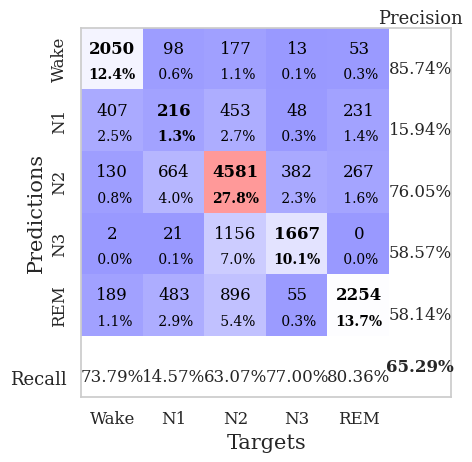

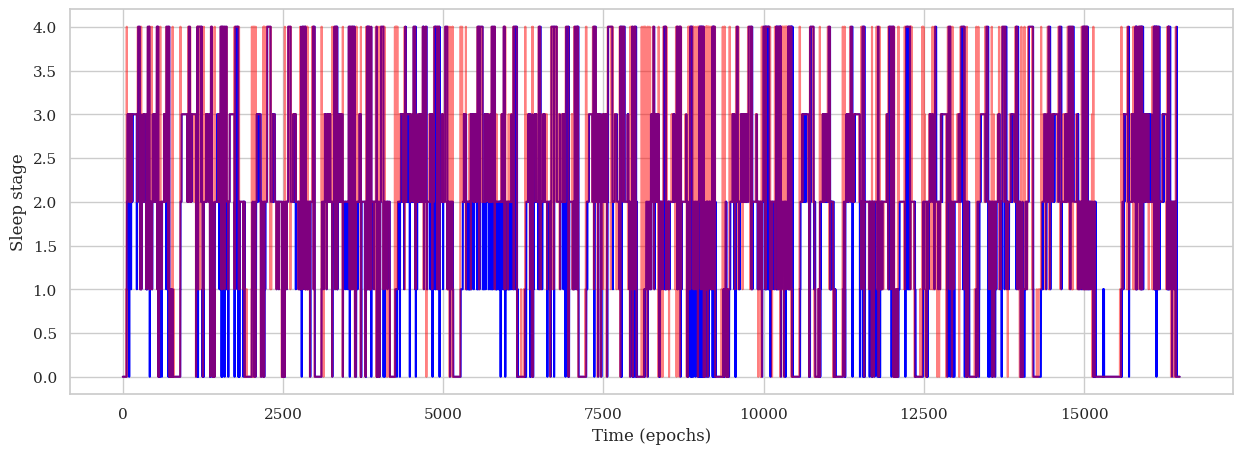

In [12]:
y_true, y_pred = te.test_classifier()

confusion_mat = confusion_matrix(y_true, y_pred)

plot_confusion_matrix(confusion_mat=confusion_mat, class_names=['Wake', 'N1', 'N2', 'N3', 'REM'])
plt.show()
plt.savefig("models/chambon2018/SleepPhysionet%s/fold%d/test_conf_matrix.png" % (version, fold), dpi=300, bbox_inches='tight')
plt.close()

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(y_true, color='b', label='Expert annotations')
ax.plot(y_pred, color='r', label='Predict annotations', alpha=0.5)
ax.set_xlabel('Time (epochs)')
ax.set_ylabel('Sleep stage')
plt.show()
plt.savefig("models/chambon2018/SleepPhysionet%s/fold%d/test_hypnogram.png" % (version, fold), dpi=300, bbox_inches='tight')
plt.close()
